In [1]:
import numpy as np
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.optimizers import Adam

%matplotlib inline

Using TensorFlow backend.


In [2]:
np.random.seed(12)

In [3]:
data = np.loadtxt('train.csv', skiprows=1, dtype='int', delimiter=',')

In [4]:
(x, y),(x_t, y_t) = mnist.load_data()

In [5]:
x_train = data[:, 1:]

y_train = data[:, 0]
# y_train = np_utils.to_categorical(y_train)

In [6]:
x_train = np.vstack((x_train,x.reshape(x.shape[0], 784)))
y_train = np.vstack((y_train.reshape(y_train.shape[0], 1), y.reshape(y.shape[0], 1)))

In [7]:
y_train = y_train.reshape(y_train.shape[0])

In [8]:
y_train = np_utils.to_categorical(y_train)

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype("float32")
x_train /= 255.0

In [33]:
model = Sequential()

model.add(Conv2D(40, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, data_format="channels_last"))
model.add(Conv2D(40, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(80, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(160, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))
model.add(Conv2D(240, kernel_size=(2, 2),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(105, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [54]:
model.compile(loss="categorical_crossentropy", optimizer=a, metrics=["accuracy"])

In [41]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
__________

In [53]:
a = Adam(lr=0.0000001)

In [55]:
model.fit(x_train, y_train, batch_size=300, epochs=5, verbose=2, shuffle=True)

Epoch 1/5
125s - loss: 0.0018 - acc: 0.9996
Epoch 2/5
121s - loss: 0.0020 - acc: 0.9996
Epoch 3/5
121s - loss: 0.0020 - acc: 0.9996
Epoch 4/5
122s - loss: 0.0021 - acc: 0.9996
Epoch 5/5
122s - loss: 0.0014 - acc: 0.9996


In [20]:
model.save('mnist_kaggle_new60+.h5')

### Load model and predict test input

In [38]:
model = load_model('mnist_kaggle_new60+.h5')

In [27]:
x_test = np.loadtxt('test.csv', skiprows=1, delimiter=',')

In [28]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test /= 255.0

In [49]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [50]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [51]:
np.savetxt('predict_new.csv', out, header="ImageId,Label", comments="", fmt="%d,%d")

1


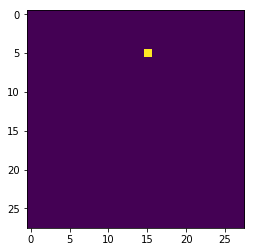

In [52]:
i = -8
print(predictions[i])
plt.imshow(x_test[i].astype('int').reshape(28,28))